In [19]:
import pandas as pd
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics as mt
# from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# import datetime
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.model_selection import train_test_split
# #from sklearn.cross_validation import KFold, cross_val_score
# from sklearn.metrics import make_scorer
# #from sklearn.grid_search import GridSearchCV
# from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from IPython.display import display

pd.set_option('display.max_rows', 10)
df = pd.read_csv('data/TrafficCrashesChicago.csv')

In [20]:
# lower case
df.columns = [x.lower() for x in df.columns]

# drop colunms having more than 100000 rows
df_thresh = df.dropna(axis = 1, thresh=100000)

In [21]:
#categorical features research
# getting object only
obj_df = df_thresh.select_dtypes(include = ['object'])

# choose potential class columns with less than 5: ['report_type','crash_type','hit_and_run_i','damage','street_direction','most_severe_injury' ]
class_df = obj_df[['report_type','crash_type','hit_and_run_i','damage','street_direction','most_severe_injury']]
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377630 entries, 0 to 377629
Data columns (total 6 columns):
report_type           368884 non-null object
crash_type            377630 non-null object
hit_and_run_i         104899 non-null object
damage                377630 non-null object
street_direction      377628 non-null object
most_severe_injury    375396 non-null object
dtypes: object(6)
memory usage: 17.3+ MB


In [22]:
# review class_df
for i in class_df.columns:
    print('***** Object name: ', class_df[i].name, ': % *****')
    print(class_df[i].value_counts(normalize = True, dropna = False) *100, '\n\n')
    


***** Object name:  report_type : % *****
NOT ON SCENE (DESK REPORT)    60.739348
ON SCENE                      36.944628
NaN                            2.316024
Name: report_type, dtype: float64 


***** Object name:  crash_type : % *****
NO INJURY / DRIVE AWAY              77.13741
INJURY AND / OR TOW DUE TO CRASH    22.86259
Name: crash_type, dtype: float64 


***** Object name:  hit_and_run_i : % *****
NaN    72.221751
Y      26.574954
N       1.203294
Name: hit_and_run_i, dtype: float64 


***** Object name:  damage : % *****
OVER $1,500      56.392765
$501 - $1,500    30.186426
$500 OR LESS     13.420809
Name: damage, dtype: float64 


***** Object name:  street_direction : % *****
W      35.703202
S      32.526282
N      24.879644
E       6.890342
NaN     0.000530
Name: street_direction, dtype: float64 


***** Object name:  most_severe_injury : % *****
NO INDICATION OF INJURY     87.370177
NONINCAPACITATING INJURY     6.575484
REPORTED, NOT EVIDENT        3.876016
INCAPACITATIN

### findings: I would suggests to classifying damage
1. Over \$1,500
2. Less than \$500.



In [23]:
# def custom_rating(genre,rating):
#     if 'Thriller' in genre:
#         return min(10,rating+1)
#     elif 'Comedy' in genre:
#         return max(0,rating-1)
#     else:
#         return rating
        
# df['CustomRating'] = df.apply(lambda x: custom_rating(x['Genre'],x['Rating']),axis=1)

In [24]:


pd.set_option('display.max_rows', 20)


# def custom_damage(damage):
#     if '$501 - $1,500' in damage:
#         return 'Less$1,500'
#     elif '$500 OR LESS' in damage:
#         return 'Less$1,500'
#     else:
#         return 'Over$1,500'


# df_thresh['damage2'] = df_thresh.apply(lambda x: custom_damage(x['damage']),axis=1)
df_thresh['damage1'] = df_thresh['damage'].map({'OVER $1,500': 'Over$1,500', '$501 - $1,500':'Less$1,500','$500 OR LESS': 'Less$1,500'})
# display(df_thresh.groupby(by=['damage1','damage2']).mean().T)
# df_thresh.damage1.value_counts(normalize=True).plot(kind='bar')





C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## team decision for class: crash_type



crash_type,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY
posted_speed_limit,29.481039,27.878339
lane_cnt,2.673933,16.607070
street_no,3711.299875,3541.303226
beat_of_occurrence,1210.117286,1259.982224
num_units,2.098892,1.997592
injuries_total,0.716895,0.000000
injuries_fatal,0.003866,0.000000
injuries_incapacitating,0.077743,0.000000
injuries_non_incapacitating,0.390551,0.000000
injuries_reported_not_evident,0.244735,0.000000


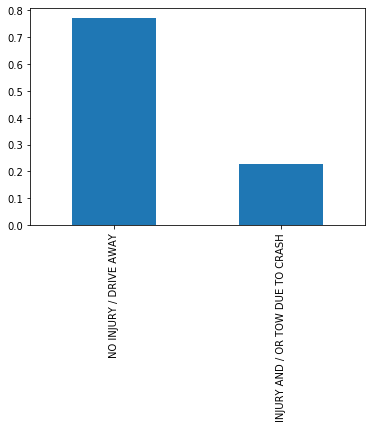

In [25]:
pd.set_option('display.max_rows', 20)
display(df_thresh.groupby(by='crash_type').mean().T)
df_thresh.crash_type.value_counts(normalize=True).plot(kind='bar')

## sampling issue. downsampling.

In [30]:
# Separate majority and minority classes
df_majority = df[df_thresh.crash_type=='NO INJURY / DRIVE AWAY']
df_minority = df[df_thresh.crash_type=='INJURY AND / OR TOW DUE TO CRASH']

df_minority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86336 entries, 7 to 377627
Data columns (total 48 columns):
rd_no                            86336 non-null object
crash_date_est_i                 5399 non-null object
crash_date                       86336 non-null object
posted_speed_limit               86336 non-null int64
traffic_control_device           86336 non-null object
device_condition                 86336 non-null object
weather_condition                86336 non-null object
lighting_condition               86336 non-null object
first_crash_type                 86336 non-null object
trafficway_type                  86336 non-null object
lane_cnt                         46331 non-null float64
alignment                        86336 non-null object
roadway_surface_cond             86336 non-null object
road_defect                      86336 non-null object
report_type                      83286 non-null object
crash_type                       86336 non-null object
intersectio

In [7]:
df_thresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377630 entries, 0 to 377629
Data columns (total 40 columns):
rd_no                            377630 non-null object
crash_date                       377630 non-null object
posted_speed_limit               377630 non-null int64
traffic_control_device           377630 non-null object
device_condition                 377630 non-null object
weather_condition                377630 non-null object
lighting_condition               377630 non-null object
first_crash_type                 377630 non-null object
trafficway_type                  377630 non-null object
lane_cnt                         198549 non-null float64
alignment                        377630 non-null object
roadway_surface_cond             377630 non-null object
road_defect                      377630 non-null object
report_type                      368884 non-null object
crash_type                       377630 non-null object
hit_and_run_i                    104899 non-null 

In [20]:
data = df_thresh
data.hit_and_run_i.unique()

array(['N', 'Y'], dtype=object)

In [21]:
data['hit_and_run_i'].fillna('N', inplace = True)

In [34]:
#lane_cnt lambda apply
data.lane_cnt.sort_values(ascending=False).head(20)

113414    1191625.0
154771     433634.0
113422     299679.0
117962     218474.0
111873        902.0
144811        400.0
169983        100.0
89182         100.0
79900          99.0
154257         99.0
228899         99.0
323460         99.0
305449         99.0
113050         99.0
110525         99.0
136054         99.0
186011         99.0
85046          99.0
61574          99.0
88356          99.0
Name: lane_cnt, dtype: float64

In [35]:
def lane_count(lanes):
    if lanes >= 26:
        return 26
    else:
        return lanes

data['lane_cnt_1'] = data.apply(lambda x: lane_count(x['lane_cnt']),axis=1)
data['lane_cnt_1'].sort_values(ascending = False).head()
        



C:\Users\sxc0126\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


118698    26.0
136054    26.0
164934    26.0
85046     26.0
61574     26.0
Name: lane_cnt_1, dtype: float64

In [39]:
data['lane_cnt_1'].fillna(data['lane_cnt_1'].median(),inplace=True)
data.lane_cnt_1.isnull().sum()

0

In [ ]:
# categorical -> one hot encoding
# convert each categorical feature using one-hot encoding

obj_df = df_thresh_dtypes(include=["object"]).drop("wage", axis=1)
int_df = adult.select_dtypes(include=["int64"])

onehot_obj = pd.get_dummies(obj_df, drop_first=True)# dummy trap(one variable can be induced)
design_adult = pd.concat([onehot_obj,int_df], axis=1)

display(design_adult)